## Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from matplotlib import style
from sklearn.decomposition import PCA


## Import data

In [2]:
df = pd.read_csv('https://query.data.world/s/kvyyj24a4fqdqhxdpbwxp4pnmnj2qz', header=None)
df.columns += 1


## Explore data

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


### Variables

In [4]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [5]:
## Select some columns ( 3,4,5,10,15,16,21,22,23,31,34,35,36,37,38,39,40,41,42,47,55,56,57,63,64)

In [6]:
df_segment= df[[3,4,10,15,16,21,22,23,31,34,35,36,42,47,55,56,57,63,64]]

In [7]:
df_segment.head()

,3,4,10,15,16,21,22,23,31,34,35,36,42,47,55,56,57,63,64
0,3,2,7,6,1,1,2,5,8,1,8,1,4,6,0,0,0,0,0
1,2,2,6,5,0,0,5,0,7,2,6,3,5,0,0,0,0,0,0
2,2,2,3,2,0,0,7,0,2,2,9,0,3,6,0,0,0,0,0
3,3,3,5,4,3,0,3,1,4,0,7,2,4,6,0,0,0,0,0
4,4,2,7,4,5,4,0,0,5,1,5,4,6,0,0,0,0,0,0


In [8]:
df_segment.columns = ['Avg size of household','Avg Age','Percent Married people', 'Percent of Household with children','Percent High Education','Farmer', 'Middle Management','Skilled Laborers','Home Owners', 'No Car','National Health Service','Private Health insurance','Average Income','Contribution to Car policies','Life insurance','Private accidents','Family accidents','property insurance','social security insurance' ]

In [9]:
df_segment.head()

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Farmer,Middle Management,Skilled Laborers,Home Owners,No Car,National Health Service,Private Health insurance,Average Income,Contribution to Car policies,Life insurance,Private accidents,Family accidents,property insurance,social security insurance
0,3,2,7,6,1,1,2,5,8,1,8,1,4,6,0,0,0,0,0
1,2,2,6,5,0,0,5,0,7,2,6,3,5,0,0,0,0,0,0
2,2,2,3,2,0,0,7,0,2,2,9,0,3,6,0,0,0,0,0
3,3,3,5,4,3,0,3,1,4,0,7,2,4,6,0,0,0,0,0
4,4,2,7,4,5,4,0,0,5,1,5,4,6,0,0,0,0,0,0


In [10]:
df_segment.describe()

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Farmer,Middle Management,Skilled Laborers,Home Owners,No Car,National Health Service,Private Health insurance,Average Income,Contribution to Car policies,Life insurance,Private accidents,Family accidents,property insurance,social security insurance
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000
mean,2.678805,2.991240,6.183442,4.300240,1.461010,0.522329,2.899004,2.219856,4.771728,1.959464,6.277053,2.728959,3.784438,2.970457,0.194778,0.013741,0.015287,0.01563,0.047578
std,0.789835,0.814589,1.909482,2.005283,1.622967,1.056926,1.839675,1.730840,3.089837,1.599714,1.978675,1.981893,1.317783,2.920669,0.898100,0.209260,0.192471,0.20456,0.409016
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,2.000000,5.000000,3.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,5.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.000000,3.000000,6.000000,4.000000,1.000000,0.000000,3.000000,2.000000,5.000000,2.000000,7.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,3.000000,3.000000,7.000000,6.000000,2.000000,1.000000,4.000000,3.000000,7.000000,3.000000,8.000000,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,5.000000,6.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,6.000000,3.000000,6.00000,5.000000


In [11]:
income = df[[37,38,39,40,41,42]]
income.columns = ["< 30,000", "30,000 - 45,000", '45,000 - 75,000', '75,000 - 120,000', '> 120,000', 'Percent Near Average']

In [12]:
def data_conversion(num):
    percent_dict = {0 : 0, 1 : .05, 2 : .17, 3 : .30, 4 : .43,
                    5 : .56, 6 : .69, 7 : .84, 8 : .94, 9 : 1.0}
    return percent_dict[num]


In [13]:
income = income.applymap(data_conversion)

In [14]:
income.loc[:,'< 30,000'] *= 15000
income.loc[:,'30,000 - 45,000'] *= 37500
income.loc[:, '45,000 - 75,000'] *= 60000
income.loc[:, '75,000 - 120,000'] *= 97500
income.loc[:,'> 120,000'] *= 120000
income['Average Income'] = income.sum(axis = 1)
income.head()

,"< 30,000","30,000 - 45,000","45,000 - 75,000","75,000 - 120,000","> 120,000",Percent Near Average,Average Income
0,0.0,16125.0,33600.0,0.0,0.0,0.43,49725.43
1,2550.0,0.0,33600.0,16575.0,0.0,0.56,52725.56
2,6450.0,21000.0,0.0,0.0,0.0,0.30,27450.30
3,750.0,21000.0,18000.0,0.0,0.0,0.43,39750.43
4,0.0,0.0,60000.0,0.0,0.0,0.69,60000.69


In [15]:
df_segment.loc[:,'Average Income'] = income['Average Income']

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
df_segment.head()

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Farmer,Middle Management,Skilled Laborers,Home Owners,No Car,National Health Service,Private Health insurance,Average Income,Contribution to Car policies,Life insurance,Private accidents,Family accidents,property insurance,social security insurance
0,3,2,7,6,1,1,2,5,8,1,8,1,49725.43,6,0,0,0,0,0
1,2,2,6,5,0,0,5,0,7,2,6,3,52725.56,0,0,0,0,0,0
2,2,2,3,2,0,0,7,0,2,2,9,0,27450.30,6,0,0,0,0,0
3,3,3,5,4,3,0,3,1,4,0,7,2,39750.43,6,0,0,0,0,0
4,4,2,7,4,5,4,0,0,5,1,5,4,60000.69,0,0,0,0,0,0


In [17]:
df_segment.corr()

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Farmer,Middle Management,Skilled Laborers,Home Owners,No Car,National Health Service,Private Health insurance,Average Income,Contribution to Car policies,Life insurance,Private accidents,Family accidents,property insurance,social security insurance
Avg size of household,1.000000,-0.328257,0.534798,0.794014,0.008053,0.106960,-0.004949,0.037590,0.338389,-0.401747,-0.073419,0.073875,0.310369,0.021131,0.025971,0.003841,0.016483,0.013003,0.034550
Avg Age,-0.328257,1.000000,-0.040384,-0.355754,-0.025792,0.090716,-0.162686,-0.048103,-0.023182,0.197608,-0.122024,0.124200,-0.117847,-0.015417,-0.029134,0.019855,-0.006816,-0.013612,-0.019373
Percent Married people,0.534798,-0.040384,1.000000,0.500354,0.075038,0.019761,-0.007196,0.026831,0.392495,-0.610018,-0.229339,0.232261,0.374196,0.026108,0.031553,0.016907,0.020882,-0.008661,0.036115
Percent of Household with children,0.794014,-0.355754,0.500354,1.000000,-0.036045,0.028367,-0.033131,0.113677,0.239638,-0.339481,-0.033914,0.031632,0.250423,0.032783,0.025710,0.006133,0.015703,0.009079,0.023214
Percent High Education,0.008053,-0.025792,0.075038,-0.036045,1.000000,-0.125380,0.041374,-0.339358,0.228864,-0.156832,-0.520919,0.518464,0.454773,-0.000823,0.028076,-0.015620,0.009333,0.021758,0.036567
Farmer,0.106960,0.090716,0.019761,0.028367,-0.125380,1.000000,-0.284217,-0.067762,0.189069,0.034167,-0.047194,0.045782,-0.027101,-0.039911,-0.005850,0.030459,0.005500,-0.020287,-0.026897
Middle Management,-0.004949,-0.162686,-0.007196,-0.033131,0.041374,-0.284217,1.000000,-0.352505,-0.018382,-0.091170,-0.001987,0.004459,0.066209,0.010795,0.008997,-0.015137,-0.001946,0.007391,0.037209
Skilled Laborers,0.037590,-0.048103,0.026831,0.113677,-0.339358,-0.067762,-0.352505,1.000000,-0.129544,0.065512,0.394991,-0.396338,-0.238662,-0.002827,-0.011971,0.010630,0.004349,-0.003400,-0.047780
Home Owners,0.338389,-0.023182,0.392495,0.239638,0.228864,0.189069,-0.018382,-0.129544,1.000000,-0.396140,-0.366491,0.366036,0.484630,0.008333,0.039674,-0.002056,0.021757,0.008092,0.041627
No Car,-0.401747,0.197608,-0.610018,-0.339481,-0.156832,0.034167,-0.091170,0.065512,-0.396140,1.000000,0.293693,-0.296445,-0.382389,-0.053166,-0.041376,0.004230,-0.033696,-0.026937,-0.044049


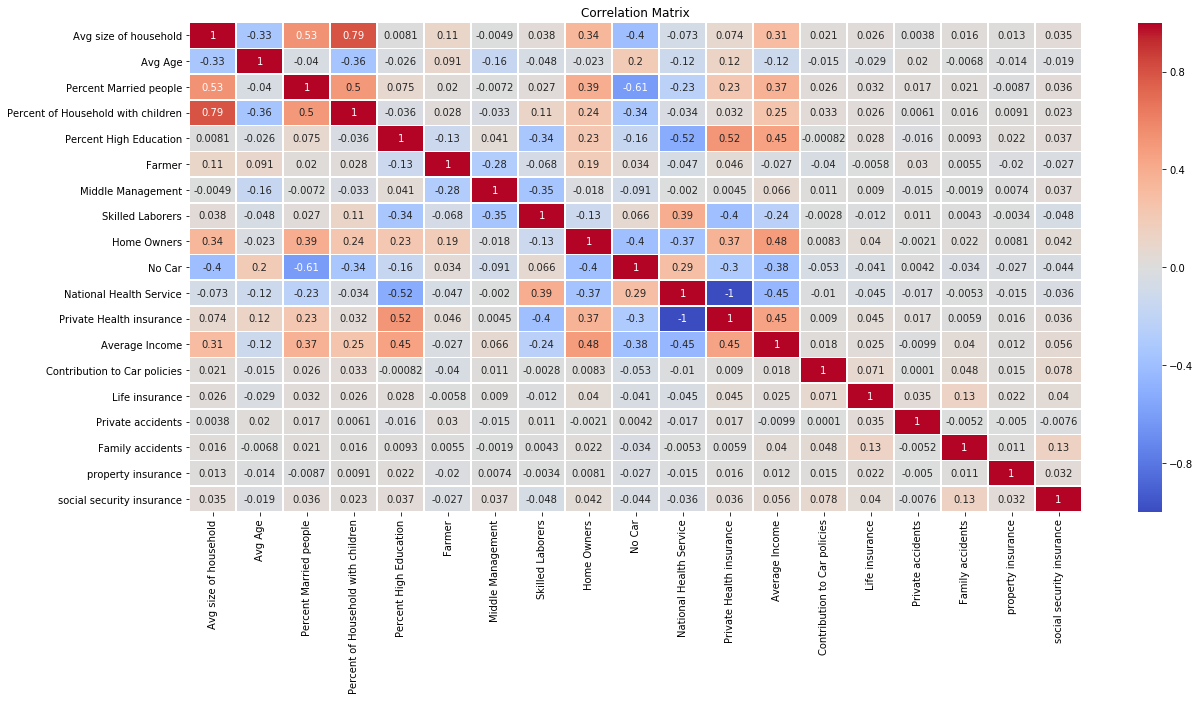

In [18]:
corrMatrix = df_segment.corr()
plt.figure(figsize = (20,9))

sns.heatmap(corrMatrix, annot=True, linewidths=0.5, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [19]:
df_segment2=df_segment[['Avg size of household','Avg Age','Percent Married people', 'Percent of Household with children','Percent High Education', 'Middle Management','Skilled Laborers','Home Owners', 'No Car','Average Income','Life insurance','National Health Service','Private Health insurance',]]

In [20]:
df_segment2.head()

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Middle Management,Skilled Laborers,Home Owners,No Car,Average Income,Life insurance,National Health Service,Private Health insurance
0,3,2,7,6,1,2,5,8,1,49725.43,0,8,1
1,2,2,6,5,0,5,0,7,2,52725.56,0,6,3
2,2,2,3,2,0,7,0,2,2,27450.30,0,9,0
3,3,3,5,4,3,3,1,4,0,39750.43,0,7,2
4,4,2,7,4,5,0,0,5,1,60000.69,0,5,4


In [21]:
scaler = StandardScaler()
segment_std = scaler.fit_transform(df_segment2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
df_segment2.dtypes

Avg size of household                   int64
Avg Age                                 int64
Percent Married people                  int64
Percent of Household with children      int64
Percent High Education                  int64
Middle Management                       int64
Skilled Laborers                        int64
Home Owners                             int64
No Car                                  int64
Average Income                        float64
Life insurance                          int64
National Health Service                 int64
Private Health insurance                int64
dtype: object

In [23]:
hier_clust=linkage(segment_std, method='ward')

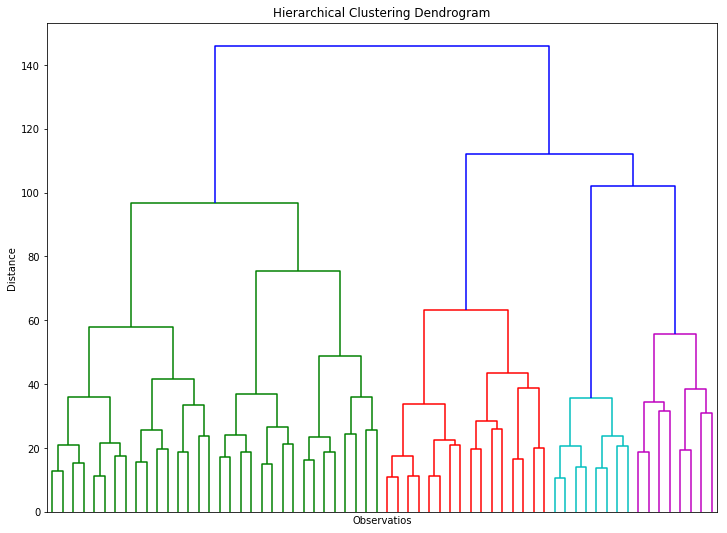

In [24]:
plt.figure(figsize=(12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observatios")
plt.ylabel("Distance")
dendrogram(hier_clust,  
           truncate_mode='level',
           p=5,
          show_leaf_counts=False,
          no_labels=True,
          )
plt.show()

In [25]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segment_std)
    wcss.append(kmeans.inertia_)

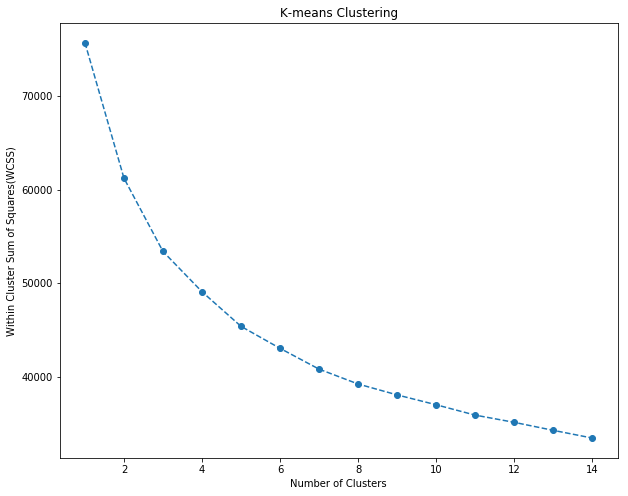

In [26]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15),wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.title('K-means Clustering')
plt.show()

In [27]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(segment_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [28]:
df_segm_kmeans = df_segment2.copy()
df_segm_kmeans['Segmentation K-means'] = kmeans.labels_

In [29]:
df_segm_analysis=df_segm_kmeans.groupby(['Segmentation K-means']).mean()
df_segm_analysis

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Middle Management,Skilled Laborers,Home Owners,No Car,Average Income,Life insurance,National Health Service,Private Health insurance
Segmentation K-means,,,,,,,,,,,,,
0,3.154070,2.721899,6.988857,5.564922,0.683624,2.632267,3.069283,4.891957,1.605620,41606.232820,0.003876,7.318798,1.685078
1,2.924138,2.998119,7.157994,4.626959,2.807524,3.134169,1.183699,6.917868,0.919749,55025.997285,0.020690,4.128527,4.883386
2,2.807229,2.871486,6.558233,4.646586,1.630522,2.971888,2.248996,5.389558,1.590361,44437.474659,4.188755,5.923695,3.080321
3,1.945141,3.291536,4.454023,2.619122,1.155172,2.981191,2.163532,2.773250,3.255486,33950.499901,0.026123,6.990073,2.013584


In [30]:
## learn the cluster sizes

In [31]:
df_segm_analysis['Number of observations']=df_segm_kmeans[['Segmentation K-means','Avg size of household']].groupby(['Segmentation K-means']).count()

In [32]:
df_segm_analysis['Probability of observations']=df_segm_analysis['Number of observations']/df_segm_analysis['Number of observations'].sum()

In [33]:
df_segm_analysis

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Middle Management,Skilled Laborers,Home Owners,No Car,Average Income,Life insurance,National Health Service,Private Health insurance,Number of observations,Probability of observations
Segmentation K-means,,,,,,,,,,,,,,,
0,3.154070,2.721899,6.988857,5.564922,0.683624,2.632267,3.069283,4.891957,1.605620,41606.232820,0.003876,7.318798,1.685078,2064,0.354517
1,2.924138,2.998119,7.157994,4.626959,2.807524,3.134169,1.183699,6.917868,0.919749,55025.997285,0.020690,4.128527,4.883386,1595,0.273961
2,2.807229,2.871486,6.558233,4.646586,1.630522,2.971888,2.248996,5.389558,1.590361,44437.474659,4.188755,5.923695,3.080321,249,0.042769
3,1.945141,3.291536,4.454023,2.619122,1.155172,2.981191,2.163532,2.773250,3.255486,33950.499901,0.026123,6.990073,2.013584,1914,0.328753


In [34]:
df_segm_analysis=df_segm_analysis.rename({0:'Average familiy of skilled laborer', 1:'White collar family', 2:'Standard Family', 3:'Singles with Fewer Opportunities'})

In [35]:
df_segm_analysis[['Number of observations', 'Probability of observations']]

,Number of observations,Probability of observations
Segmentation K-means,,
Average familiy of skilled laborer,2064,0.354517
White collar family,1595,0.273961
Standard Family,249,0.042769
Singles with Fewer Opportunities,1914,0.328753


In [36]:
df_segm_kmeans['Labels']=df_segm_kmeans['Segmentation K-means'].map({0:'Average familiy of skilled laborer', 1:'White collar family', 2:'Standard Family', 3:'Singles with Fewer Opportunities'})

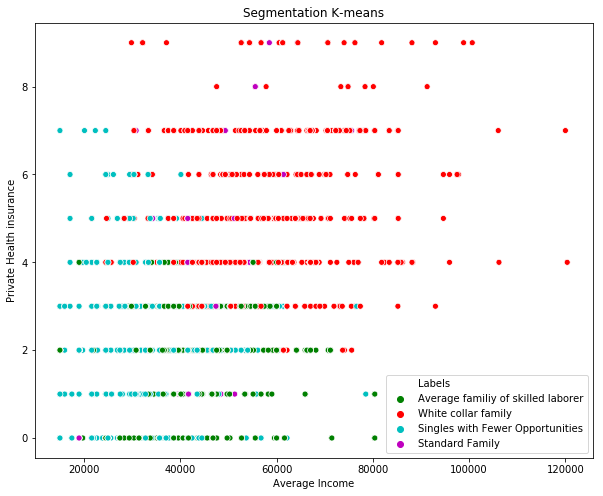

In [37]:
x_axis=df_segm_kmeans['Average Income']
y_axis=df_segm_kmeans['Private Health insurance']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue=df_segm_kmeans['Labels'], palette=['g','r','c','m'])
plt.title('Segmentation K-means')
plt.show()

In [38]:
## Pricipal Componen Analysis (PCA) - Dimensionality reduction

In [39]:
pca=PCA()
pca.fit(segment_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.explained_variance_ratio_
##sum is equal to 1, shows percent of information

array([2.97525306e-01, 1.90240990e-01, 1.02173888e-01, 7.68096838e-02,
       7.10690104e-02, 5.79419995e-02, 5.25510415e-02, 4.44054289e-02,
       3.72146732e-02, 3.18816185e-02, 2.31607009e-02, 1.49693777e-02,
       5.62811671e-05])

Text(0, 0.5, 'Cumulative explained variance')

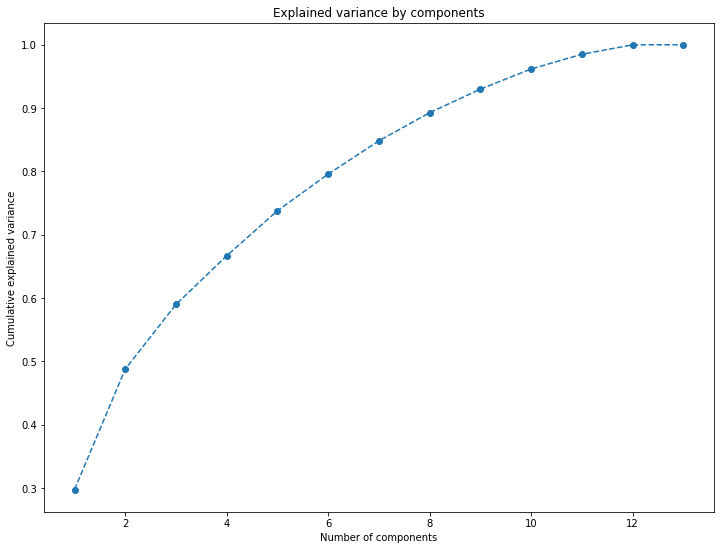

In [41]:
plt.figure(figsize=(12,9))
plt.plot(range(1,14), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [42]:
## Rule of thumb: keep at least 70-80% of explained variance
## chose 6

In [43]:
pca = PCA(n_components=6)
pca.fit(segment_std)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
pca.components_

array([[-0.28237955,  0.07880729, -0.32784152, -0.24351636, -0.26799434,
        -0.04400666,  0.17604856, -0.33346584,  0.33664066, -0.37409905,
        -0.0370198 ,  0.37183614, -0.37203653],
       [-0.42250503,  0.28679683, -0.26885747, -0.44632413,  0.29713973,
         0.05942811, -0.32273911, -0.03519665,  0.17894907,  0.04231765,
        -0.00240676, -0.34401709,  0.34403103],
       [-0.04196546,  0.45855598,  0.16329736, -0.02791808, -0.07306349,
        -0.7155328 ,  0.43107799,  0.14382671,  0.00857854, -0.03737307,
        -0.02285857, -0.13197121,  0.13141839],
       [-0.02005934, -0.07659422, -0.05030246, -0.00481818,  0.0215425 ,
        -0.05569884,  0.05419784, -0.01834424,  0.02013631, -0.03494287,
         0.99101909, -0.01753451,  0.0168604 ],
       [ 0.10117852, -0.54141703, -0.38504301,  0.17551448,  0.40641753,
        -0.39973916,  0.15016242, -0.15261322,  0.32264778,  0.13672791,
        -0.10534531, -0.08322432,  0.07707703],
       [-0.3085725 , -0.173947

In [45]:
df_pca_comp=pd.DataFrame(data=pca.components_, columns=df_segment2.columns.values, index=['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6'] )
df_pca_comp

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Middle Management,Skilled Laborers,Home Owners,No Car,Average Income,Life insurance,National Health Service,Private Health insurance
Component 1,-0.282380,0.078807,-0.327842,-0.243516,-0.267994,-0.044007,0.176049,-0.333466,0.336641,-0.374099,-0.037020,0.371836,-0.372037
Component 2,-0.422505,0.286797,-0.268857,-0.446324,0.297140,0.059428,-0.322739,-0.035197,0.178949,0.042318,-0.002407,-0.344017,0.344031
Component 3,-0.041965,0.458556,0.163297,-0.027918,-0.073063,-0.715533,0.431078,0.143827,0.008579,-0.037373,-0.022859,-0.131971,0.131418
Component 4,-0.020059,-0.076594,-0.050302,-0.004818,0.021543,-0.055699,0.054198,-0.018344,0.020136,-0.034943,0.991019,-0.017535,0.016860
Component 5,0.101179,-0.541417,-0.385043,0.175514,0.406418,-0.399739,0.150162,-0.152613,0.322648,0.136728,-0.105345,-0.083224,0.077077
Component 6,-0.308573,-0.173948,-0.024566,-0.388601,0.227599,0.007013,0.262092,0.447290,-0.230935,0.415071,-0.003791,0.297068,-0.297356


([<matplotlib.axis.YTick at 0x7f4433faf080>,
 <a list of 6 Text yticklabel objects>)

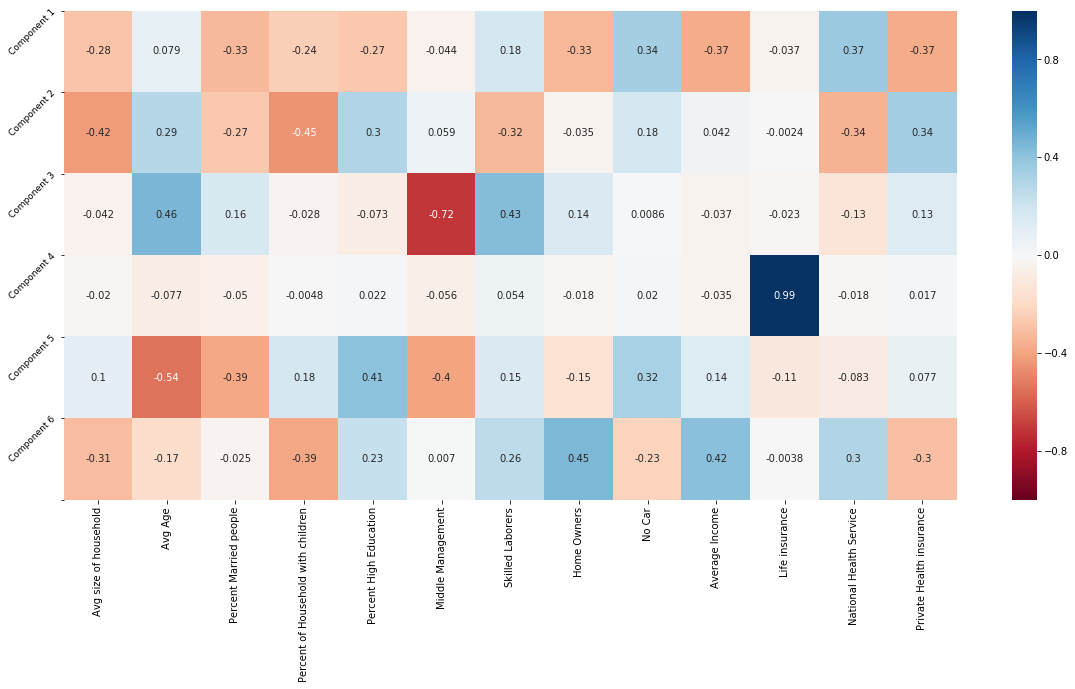

In [46]:
plt.figure(figsize=(20,9))
sns.heatmap(df_pca_comp, 
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks([0,1,2,3,4,5,6], 
          ['Component 1','Component 2', 'Component 3','Component 4','Component 5','Component 6'],
          rotation=45,
          fontsize=9)

In [47]:
##component 1 NHS/Private health insurance
##component 2 Size of household/having children
##component 3 Middle Management/skilled laborer
##component 4 Holding a life insurance
##component 5 Average age/marital status/education 
##component 6 Average income/owning home
##component 7 Having no car

In [48]:
scores_pca=pca.transform(segment_std)

In [49]:
## K-Means Clustering with PCA

In [50]:
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

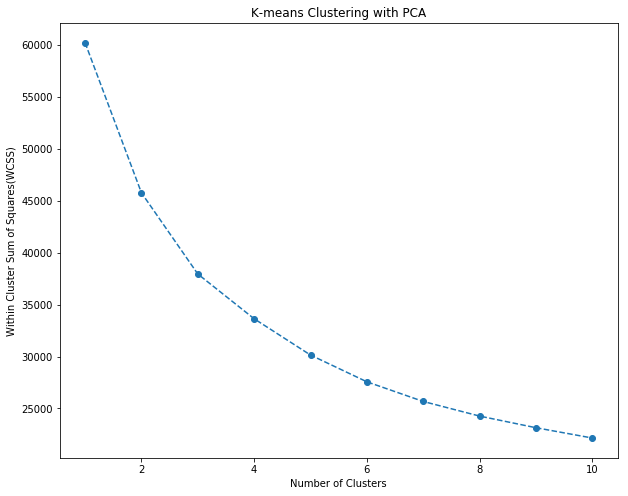

In [51]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.title('K-means Clustering with PCA')
plt.show()

In [52]:
## Chose 4

In [53]:
kmeans_pca=KMeans(n_clusters=4, init='k-means++', random_state=42)

In [54]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [55]:
## Results

In [56]:
df_segm_pca_kmeans= pd.concat([df_segment2.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-6:]=['Component 1','Component 2', 'Component 3','Component 4','Component 5','Component 6']
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_

In [57]:
df_segm_pca_kmeans.head()

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Middle Management,Skilled Laborers,Home Owners,No Car,Average Income,Life insurance,National Health Service,Private Health insurance,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA
0,3,2,7,6,1,2,5,8,1,49725.43,0,8,1,-0.253360,-2.368770,0.436266,-0.125598,0.602094,1.426493,0
1,2,2,6,5,0,5,0,7,2,52725.56,0,6,3,-0.530901,0.203109,-1.732658,-0.286351,-0.305787,0.337157,3
2,2,2,3,2,0,7,0,2,2,27450.30,0,9,0,2.641811,0.296175,-3.289864,-0.220093,-0.640389,0.393236,1
3,3,3,5,4,3,3,1,4,0,39750.43,0,7,2,-0.219624,0.105642,-0.651264,-0.237736,0.081717,0.274603,0
4,4,2,7,4,5,0,0,5,1,60000.69,0,5,4,-2.566727,0.249257,-0.004542,-0.144798,2.048951,0.188859,3


In [68]:
df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()

In [69]:
df_segm_pca_kmeans_freq

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Middle Management,Skilled Laborers,Home Owners,No Car,Average Income,Life insurance,National Health Service,Private Health insurance,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
Segment K-means PCA,,,,,,,,,,,,,,,,,,,
0,3.155523,2.721415,6.984012,5.568314,0.683140,2.633721,3.067829,4.891473,1.605136,41604.670005,0.004845,7.316860,1.687016,0.078615,-1.460211,0.096472,-0.216270,-0.025481,-0.022590
1,1.944154,3.291754,4.460856,2.615344,1.154489,2.981211,2.165971,2.771921,3.250522,33961.095157,0.026096,6.990084,2.013570,1.836311,0.965575,-0.100333,-0.116598,0.040849,-0.004321
2,2.806452,2.870968,6.556452,4.645161,1.633065,2.959677,2.254032,5.391129,1.584677,44425.527258,4.197581,5.919355,3.084677,-0.675401,-0.143968,-0.101945,4.410215,-0.447731,-0.000946
3,2.924718,2.998118,7.159348,4.629862,2.809912,3.134253,1.181305,6.924090,0.924718,55036.944944,0.020703,4.129235,4.882685,-2.203973,0.752533,0.011544,-0.265967,0.053553,0.034592


In [70]:
df_segm_pca_kmeans_freq['Number of observations']=df_segm_pca_kmeans[['Segment K-means PCA','Avg size of household']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Probability of observations']=df_segm_pca_kmeans_freq['Number of observations']/df_segm_pca_kmeans_freq['Number of observations'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Average familiy of skilled laborer', 3:'White collar family', 2:'Standard Family', 1:'Singles with Fewer Opportunities'})
df_segm_pca_kmeans_freq

,Avg size of household,Avg Age,Percent Married people,Percent of Household with children,Percent High Education,Middle Management,Skilled Laborers,Home Owners,No Car,Average Income,...,National Health Service,Private Health insurance,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Number of observations,Probability of observations
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
Average familiy of skilled laborer,3.155523,2.721415,6.984012,5.568314,0.683140,2.633721,3.067829,4.891473,1.605136,41604.670005,...,7.316860,1.687016,0.078615,-1.460211,0.096472,-0.216270,-0.025481,-0.022590,2064,0.354517
Singles with Fewer Opportunities,1.944154,3.291754,4.460856,2.615344,1.154489,2.981211,2.165971,2.771921,3.250522,33961.095157,...,6.990084,2.013570,1.836311,0.965575,-0.100333,-0.116598,0.040849,-0.004321,1916,0.329097
Standard Family,2.806452,2.870968,6.556452,4.645161,1.633065,2.959677,2.254032,5.391129,1.584677,44425.527258,...,5.919355,3.084677,-0.675401,-0.143968,-0.101945,4.410215,-0.447731,-0.000946,248,0.042597
White collar family,2.924718,2.998118,7.159348,4.629862,2.809912,3.134253,1.181305,6.924090,0.924718,55036.944944,...,4.129235,4.882685,-2.203973,0.752533,0.011544,-0.265967,0.053553,0.034592,1594,0.273789


In [71]:
df_segm_pca_kmeans_freq[['Private Health insurance', 'Number of observations', 'Probability of observations']]

,Private Health insurance,Number of observations,Probability of observations
Segment K-means PCA,,,
Average familiy of skilled laborer,1.687016,2064,0.354517
Singles with Fewer Opportunities,2.013570,1916,0.329097
Standard Family,3.084677,248,0.042597
White collar family,4.882685,1594,0.273789


In [61]:
df_segm_pca_kmeans['Legend']=df_segm_pca_kmeans['Segment K-means PCA'].map({0:'Average familiy of skilled laborer', 3:'White collar family', 2:'Standard Family', 1:'Singles with Fewer Opportunities'})

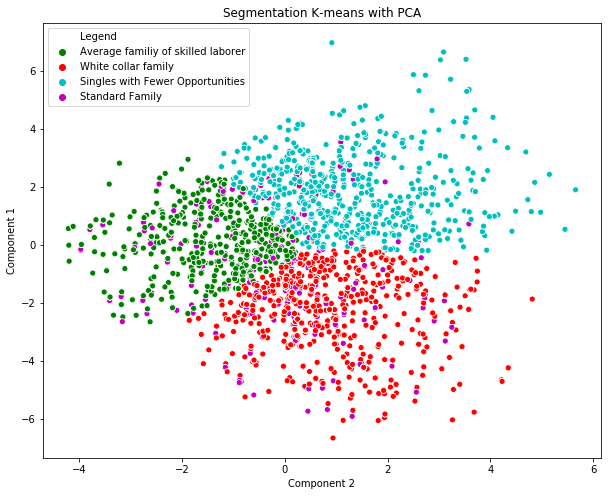

In [62]:
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue=df_segm_pca_kmeans['Legend'], palette=['g','r','c','m'])
plt.title('Segmentation K-means with PCA')
plt.show()

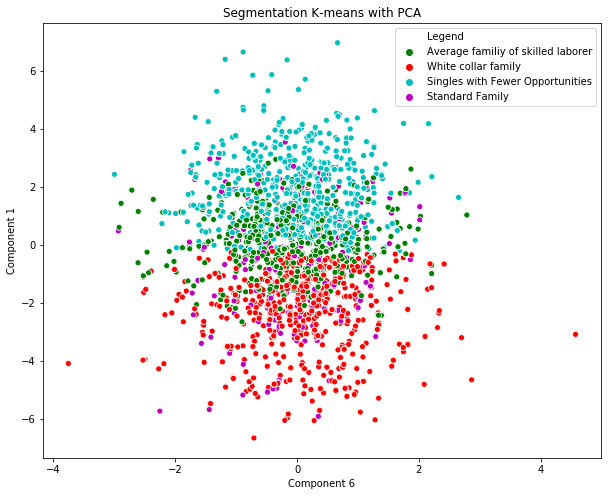

In [63]:
x_axis=df_segm_pca_kmeans['Component 6']
y_axis=df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue=df_segm_pca_kmeans['Legend'], palette=['g','r','c','m'])
plt.title('Segmentation K-means with PCA')
plt.show()